In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Load the dataset
marketing_data = pd.read_csv("marketing_dataset.csv")

# Take only the top 100 rows for analysis
marketing_data = marketing_data
marketing_data.head()

,Customer_ID,Age,Income,Gender,Location,Product_ID,Category,Sales,Rating,Order_Date,Repeat_Purchase,Acquisition_Channel,Campaign_ID,Customer_Satisfaction,Competitor_Price,NPS
0,1,59,89843,Female,Lake Brenda,1090,Electronics,281,3.1,11-06-2023,Yes,Referral,1030,4,262,3
1,2,54,140720,Female,Conleybury,1080,Electronics,426,4.9,26-09-2023,Yes,Search,1059,9,448,6
2,3,39,136014,Female,Lake Bryanburgh,1023,Home & Kitchen,737,1.8,01-03-2023,No,Email,1050,1,413,4
3,4,21,113023,Female,South Andrea,1074,Electronics,743,2.2,27-12-2023,No,Referral,1068,1,95,4
4,5,73,75419,Female,Littleland,1090,Clothing,959,4.7,27-03-2023,Yes,Search,1031,3,350,2


In [47]:
marketing_data.describe()

,Customer_ID,Age,Income,Product_ID,Sales,Rating,Campaign_ID,Customer_Satisfaction,Competitor_Price,NPS
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,48.576020,85101.933970,1050.480620,525.223650,3.002429,1050.499730,5.008320,269.103330,5.006060
std,28867.657797,17.909294,37528.352066,28.860813,274.234528,1.151688,28.836664,2.585525,132.570328,2.585678
min,1.000000,18.000000,20000.000000,1001.000000,50.000000,1.000000,1001.000000,1.000000,40.000000,1.000000
25%,25000.750000,33.000000,52610.000000,1025.000000,288.000000,2.000000,1026.000000,3.000000,154.000000,3.000000
50%,50000.500000,49.000000,85146.000000,1050.000000,526.000000,3.000000,1051.000000,5.000000,269.000000,5.000000
75%,75000.250000,64.000000,117672.250000,1075.000000,761.000000,4.000000,1075.000000,7.000000,383.000000,7.000000
max,100000.000000,79.000000,149999.000000,1100.000000,999.000000,5.000000,1100.000000,9.000000,499.000000,9.000000


In [9]:
marketing_data.isnull().sum()

Customer_ID              0
Age                      0
Income                   0
Gender                   0
Location                 0
Product_ID               0
Category                 0
Sales                    0
Rating                   0
Order_Date               0
Repeat_Purchase          0
Acquisition_Channel      0
Campaign_ID              0
Customer_Satisfaction    0
Competitor_Price         0
NPS                      0
dtype: int64

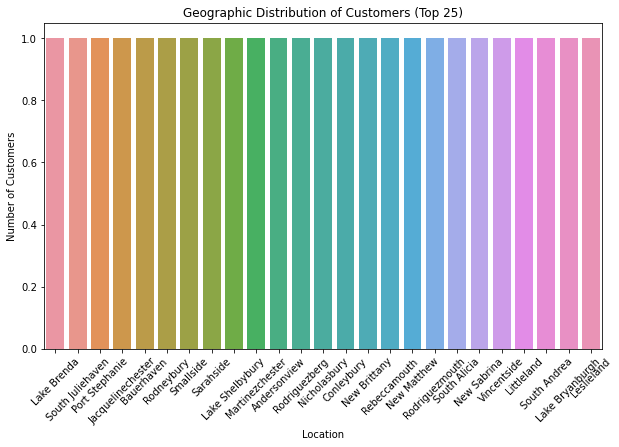

In [15]:
# Which geographic regions have the highest concentration of our customers?
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', data=marketing_data, order=marketing_data['Location'].value_counts().index)
plt.title('Geographic Distribution of Customers (Top 25)')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

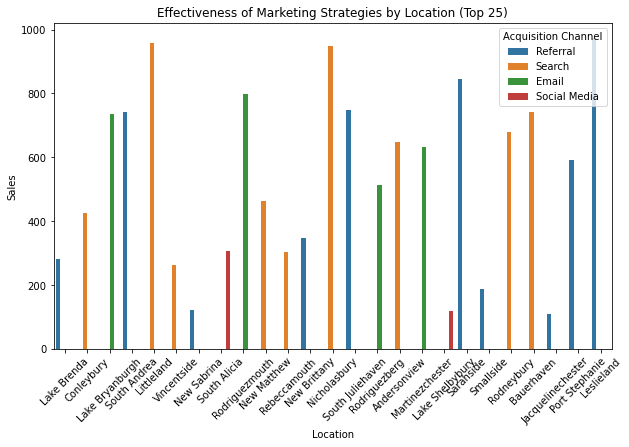

In [14]:
# What marketing strategies are most effective for each segment?
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Sales', hue='Acquisition_Channel', data=marketing_data)
plt.title('Effectiveness of Marketing Strategies by Location (Top 25)')
plt.xlabel('Location')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Acquisition Channel')
plt.show()

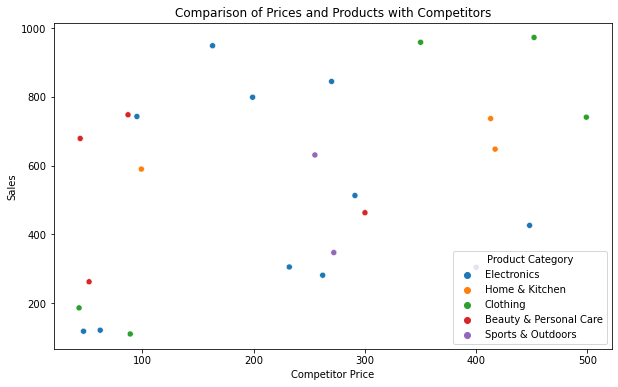

In [19]:
# How do our prices and products compare to competitors in the market?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Competitor_Price', y='Sales', hue='Category', data=marketing_data.head(100000))
plt.title('Comparison of Prices and Products with Competitors')
plt.xlabel('Competitor Price')
plt.ylabel('Sales')
plt.legend(title='Product Category')
plt.show()

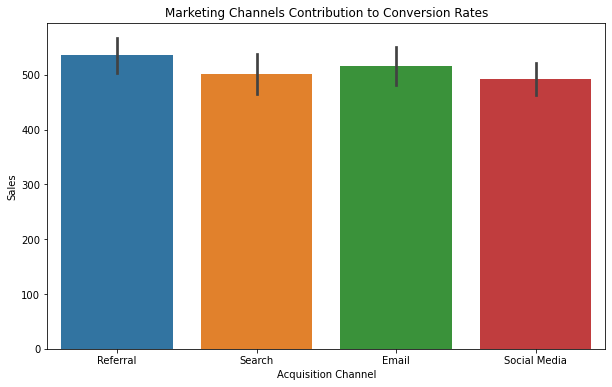

In [38]:
# How do different marketing channels contribute to conversion rates?
plt.figure(figsize=(10, 6))
sns.barplot(x='Acquisition_Channel', y='Sales', data=marketing_data.head(1000))
plt.title('Marketing Channels Contribution to Conversion Rates')
plt.xlabel('Acquisition Channel')
plt.ylabel('Sales')
plt.show()

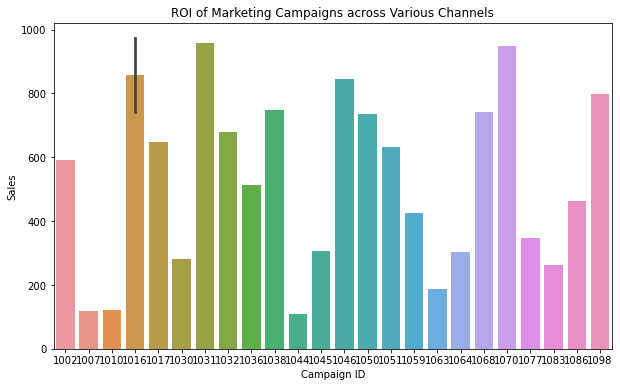

In [24]:
# What is the ROI of our marketing campaigns across various channels?
plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign_ID', y='Sales', data=marketing_data)
plt.title('ROI of Marketing Campaigns across Various Channels')
plt.xlabel('Campaign ID')
plt.ylabel('Sales')
plt.show()

C:\Users\Satvik Sinha\AppData\Local\Temp\ipykernel_26272\3255514777.py:2: UserWarning: Parsing '26-09-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  marketing_data['Order_Date'] = pd.to_datetime(marketing_data['Order_Date'])
C:\Users\Satvik Sinha\AppData\Local\Temp\ipykernel_26272\3255514777.py:2: UserWarning: Parsing '27-12-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  marketing_data['Order_Date'] = pd.to_datetime(marketing_data['Order_Date'])
C:\Users\Satvik Sinha\AppData\Local\Temp\ipykernel_26272\3255514777.py:2: UserWarning: Parsing '27-03-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  marketing_data['Order_Date'] = pd.to_datetime(marketing_data['Order_Date'])
C:\Users\Satvik Sinha\AppData\Local\Temp\ipykernel_26272\3255514777.py:2: UserWarning: Parsing '23-03-2023' in DD/MM/YYYY format. Provide format 

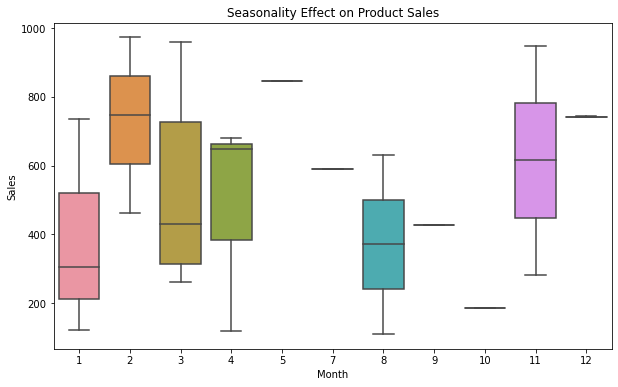

In [25]:
# How does seasonality affect product sales? Are there any correlations between product ratings and sales figures?
marketing_data['Order_Date'] = pd.to_datetime(marketing_data['Order_Date'])
marketing_data['Month'] = marketing_data['Order_Date'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Sales', data=marketing_data)
plt.title('Seasonality Effect on Product Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

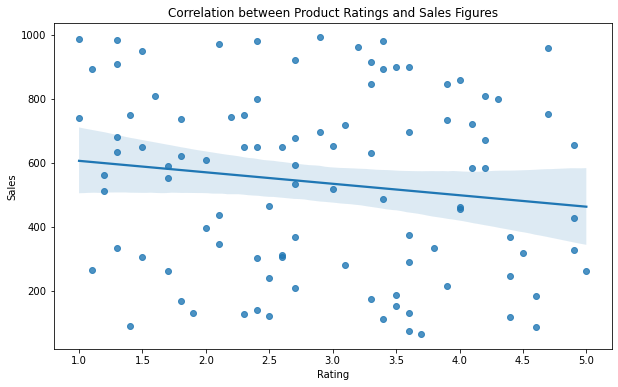

In [40]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Rating', y='Sales', data=marketing_data.head(100))
plt.title('Correlation between Product Ratings and Sales Figures')
plt.xlabel('Rating')
plt.ylabel('Sales')
plt.show()

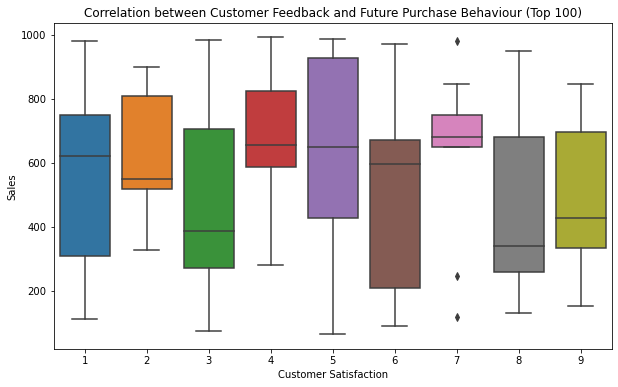

In [50]:
# Are there any correlations between customer feedback and future purchase behaviour?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer_Satisfaction', y='Sales', data=marketing_data.head(100))
plt.title('Correlation between Customer Feedback and Future Purchase Behaviour (Top 100)')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Sales')
plt.show()

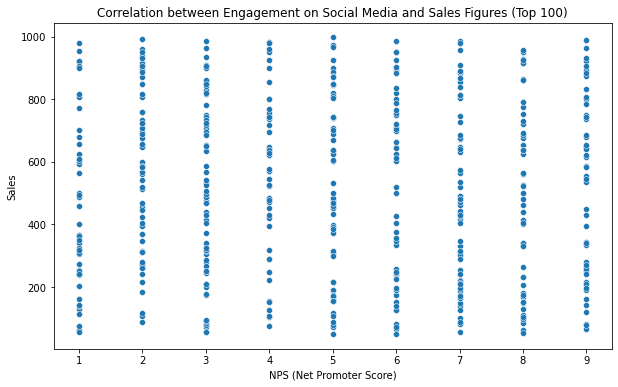

In [53]:
# How does engagement on social media correlate with sales figures?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NPS', y='Sales', data=marketing_data.head(500))
plt.title('Correlation between Engagement on Social Media and Sales Figures (Top 100)')
plt.xlabel('NPS (Net Promoter Score)')
plt.ylabel('Sales')
plt.show()

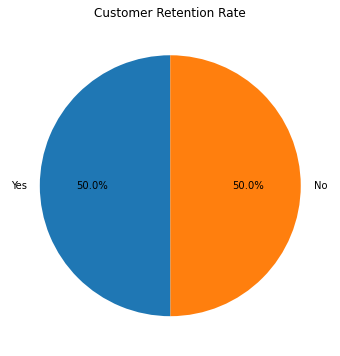

In [74]:
# Customer retention rate
repeat_purchase_counts = marketing_data['Repeat_Purchase'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(repeat_purchase_counts, labels=repeat_purchase_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Retention Rate')
plt.show()

In [54]:
# Can we develop a model to forecast future sales based on historical data, market trends, and external factors such as economic conditions and regulatory changes?
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [68]:
# Extract relevant features for the model
X = marketing_data[['Rating', 'Competitor_Price', 'NPS']]
y = marketing_data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [63]:
# Calculate the mean squared error as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error of the Model(top 100): {mse}")


Mean Squared Error of the Model(top 100): 98246.05158157776


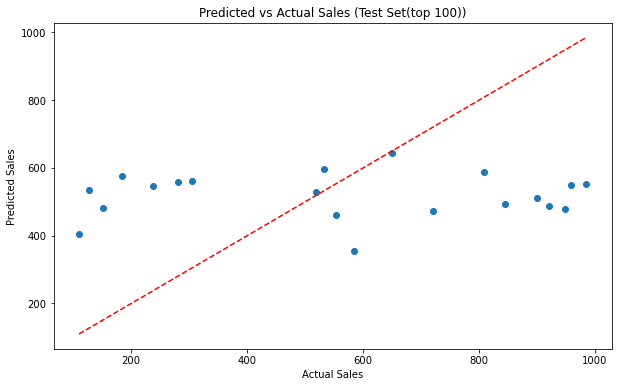

In [62]:
# Visualize predicted vs actual sales in the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Predicted vs Actual Sales (Test Set(top 100))')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [72]:
# Calculate the mean squared error as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error of the Model: {mse}")


Mean Squared Error of the Model: 75548.28374378354


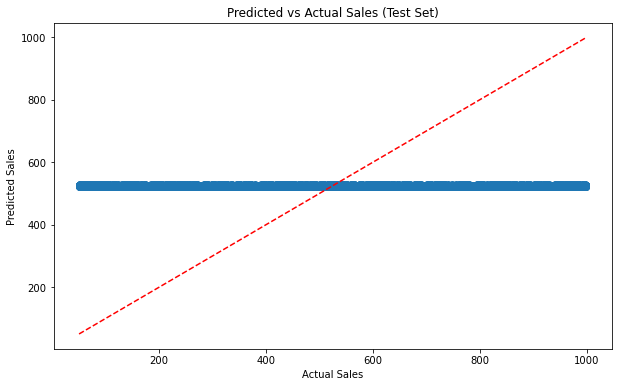

In [71]:
# Visualize predicted vs actual sales in the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Predicted vs Actual Sales (Test Set)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()